# car price prediction using mechine learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# preprocessing the data

In [ ]:
missing=df.isnull().sum()
print("Missing Values are: ", missing)

Missing Values are:  Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
duplicates=df[df.duplicated()]
print("duplicate row:")
print( duplicates)

duplicate row:
    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
17       Dealer       Manual      0  
93       Dealer    Automatic      0  


In [ ]:
print(df[df['Car_Name'] == 'ertiga'])
print(df[df['Car_Name'] == 'fortuner'])

   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
13   ertiga  2015           6.10           7.71       26000    Petrol   
15   ertiga  2016           7.75          10.79       43000    Diesel   
16   ertiga  2015           7.25          10.79       41678    Diesel   
17   ertiga  2016           7.75          10.79       43000    Diesel   
33   ertiga  2014           6.00           9.95       45000    Diesel   
48   ertiga  2015           5.80           7.71       25870    Petrol   

   Selling_type Transmission  Owner  
13       Dealer       Manual      0  
15       Dealer       Manual      0  
16       Dealer       Manual      0  
17       Dealer       Manual      0  
33       Dealer       Manual      0  
48       Dealer       Manual      0  
    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
50  fortuner  2012          14.90          30.61      104707    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_en=LabelEncoder()

df['Fuel_Type'] = label_en.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_en.fit_transform(df['Selling_type'])
df['Transmission'] = label_en.fit_transform(df['Transmission'])

# Feature engineering


In [ ]:
#calculating the car age there is already a colum yaear in the data set
#we substract the year with 2025 to get tha age of the car
#since age of car plays importnt role in the price pridiction
#we create a new colum called car_age
df['car_age'] = 2025 - df['Year']
df.drop(['Year'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,3.35,5.59,27000,2,0,1,0,11
1,4.75,9.54,43000,1,0,1,0,12
2,7.25,9.85,6900,2,0,1,0,8
3,2.85,4.15,5200,2,0,1,0,14
4,4.60,6.87,42450,1,0,1,0,11


In [ ]:
# remove the car_name column irrelavent in pridiction
df.drop(['Car_Name'],axis=1,inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


# Detecting outliers in car age , driven_km, selling price

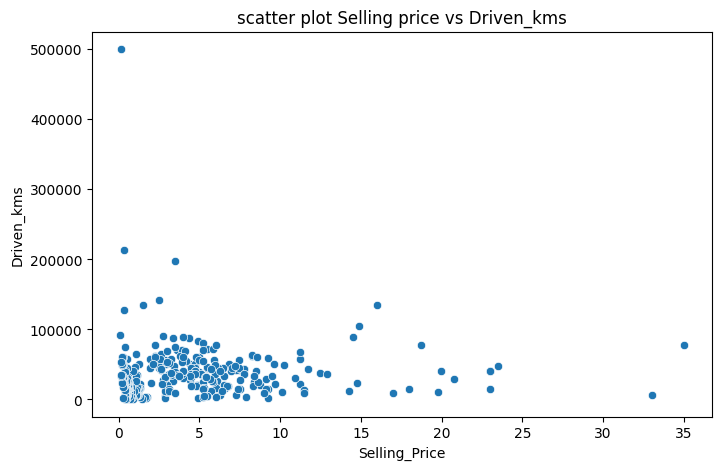

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Selling_Price'],y=df['Driven_kms'])
plt.xlabel('Selling_Price')
plt.ylabel('Driven_kms')
plt.title('scatter plot Selling price vs Driven_kms')
plt.show()

In [ ]:
#dealing with outliers in selling price
Q1=df['Selling_Price'].quantile(0.25)
Q3=df['Selling_Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 - 1.5 *IQR
outliers = df[(df['Selling_Price'] < lower_bound) | (df['Selling_Price'] > upper_bound)]
print("outliers in Selling_Price\n", outliers)


outliers in Selling_Price
     Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          2   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          2   
3    wagon r  2011           2.85           4.15        5200          2   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          2   
298     city  2009           3.35          11.00       87934          2   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          2   

     Selling_type  Transmission  Owner  
0               0             1

## split data for testing and traing
split data to 80% to training and 20% testing

In [ ]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']
train_test= x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



# Train the model using linera regression

In [ ]:
from sklearn.linear_model import LinearRegression
#intializing the model
model=LinearRegression()
model.fit(x_train, y_train)

#Predict on test data
y_pred=model.predict(x_test)

# Evaluating the model performance by calculating error metrics  

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 1.2219323621752294
Mean Squared Error: 3.5315798889713164
R2 Score: 0.8466902419662664


# Residual plot

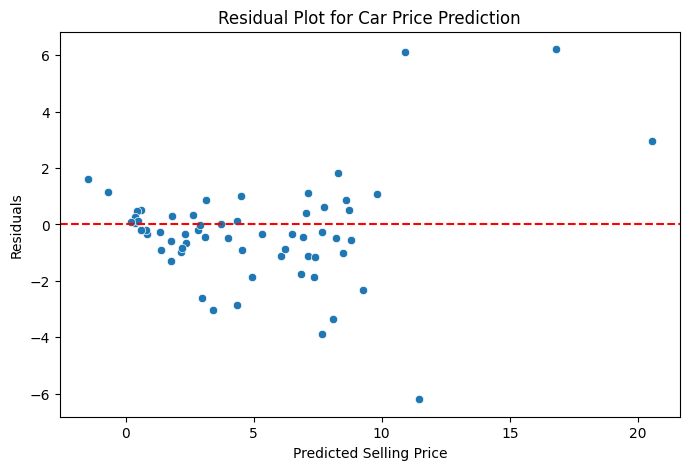

In [ ]:
residual=y_test-y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot for Car Price Prediction")
plt.show()

# Make pridiction

In [ ]:
new_car = [[5.79, 46000, 2, 0, 0, 1, 1]]   # here we provide present price, km_driven,fuel_type,transmission,owner,selling_type


pridicted_price = model.predict(new_car)
print("the pridicted price is", pridicted_price)

the pridicted price is [8.29101659]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
